In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_pickle('./data/df.pkl')
df.head(3)

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,CID
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,xxxxxxxx
1,32,F,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0,CID
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,CID


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age                           36992 non-null  int64   
 1   gender                        36992 non-null  category
 2   region_category               31564 non-null  category
 3   membership_category           36992 non-null  object  
 4   joining_date                  36992 non-null  object  
 5   joined_through_referral       36992 non-null  object  
 6   referral_id                   36992 non-null  object  
 7   preferred_offer_types         36704 non-null  category
 8   medium_of_operation           36992 non-null  category
 9   internet_option               36992 non-null  category
 10  last_visit_time               36992 non-null  object  
 11  days_since_last_login         36992 non-null  int64   
 12  avg_time_spent                36992 non-null  

In [31]:
numerical = ['points_in_wallet', 'avg_frequency_login_days', 'avg_transaction_value', 'avg_time_spent', 'days_since_last_login', 'age', 'joining_date', 'last_visit_time']
df_categorical = df.drop(numerical, axis = 1)
df_categorical = df_categorical.drop('referral_id', axis = 1)
df_categorical = df_categorical.drop('churn_risk_score', axis = 1)

In [60]:
df_numerical = df[numerical]
df_numerical.head()

,points_in_wallet,avg_frequency_login_days,avg_transaction_value,avg_time_spent,days_since_last_login,age,joining_date,last_visit_time
0,781.75,17.0,53005.25,300.63,17,18,2017-08-17,16:08:02
1,NaN,10.0,12838.38,306.34,16,32,2017-08-28,12:38:13
2,500.69,22.0,21027.00,516.16,14,44,2016-11-11,22:53:21
3,567.66,6.0,25239.56,53.27,11,37,2016-10-29,15:57:50
4,663.06,16.0,24483.66,113.13,20,31,2017-09-12,15:46:44


In [24]:
df_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,CID
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,Yes,Yes,No,Not Applicable,Products always in Stock,xxxxxxxx
1,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,Yes,No,Yes,Solved,Quality Customer Care,CID
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,No,Yes,Yes,Solved in Follow-up,Poor Website,CID
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,No,Yes,Yes,Unsolved,Poor Website,CID
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,No,Yes,Yes,Solved,Poor Website,xxxxxxxx


In [45]:
df['gender'].nunique()

3

In [52]:
len(df['gender'].unique()[0])

1

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


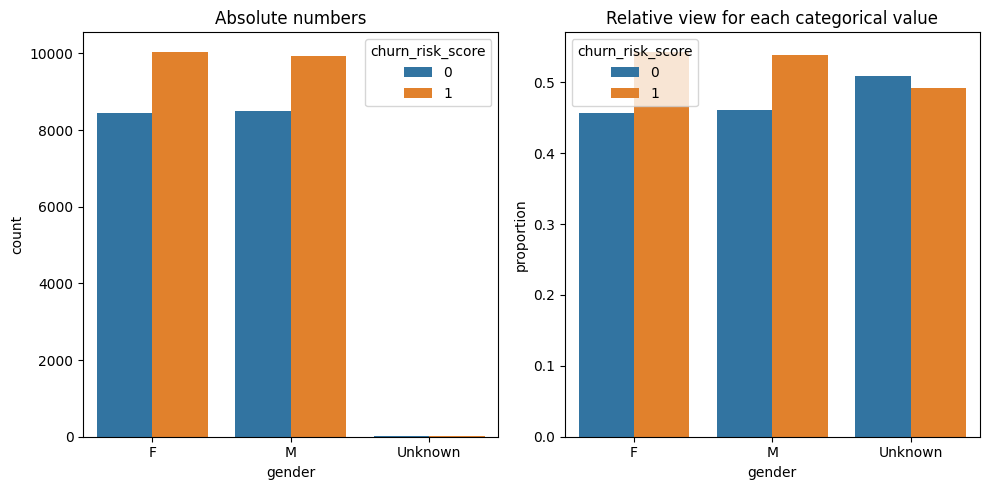

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


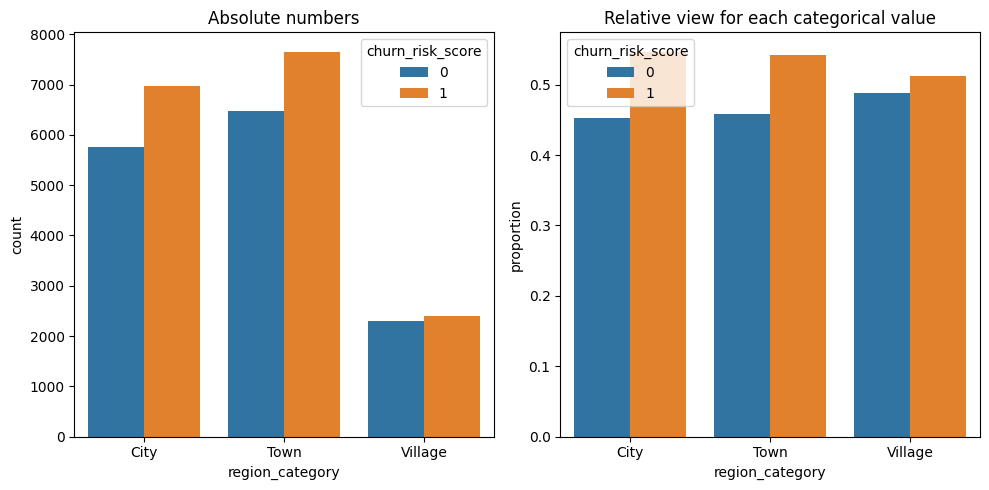

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


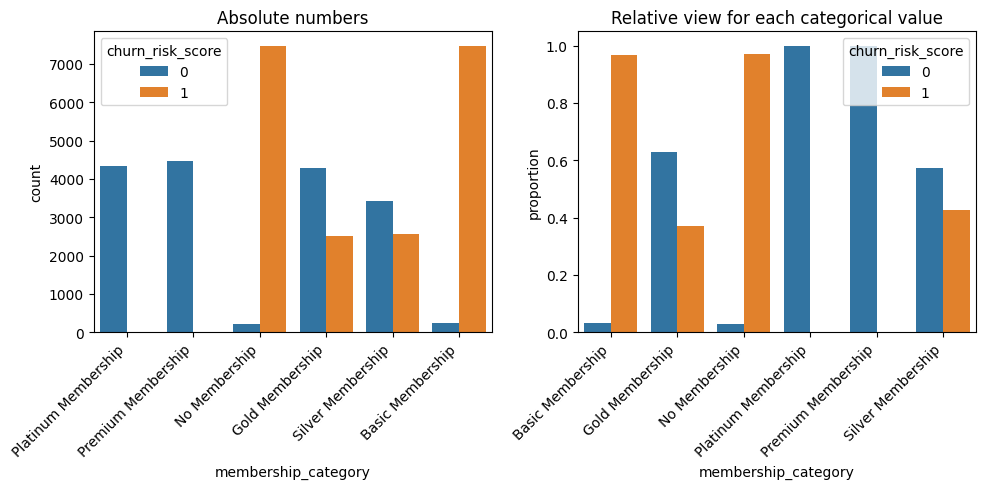

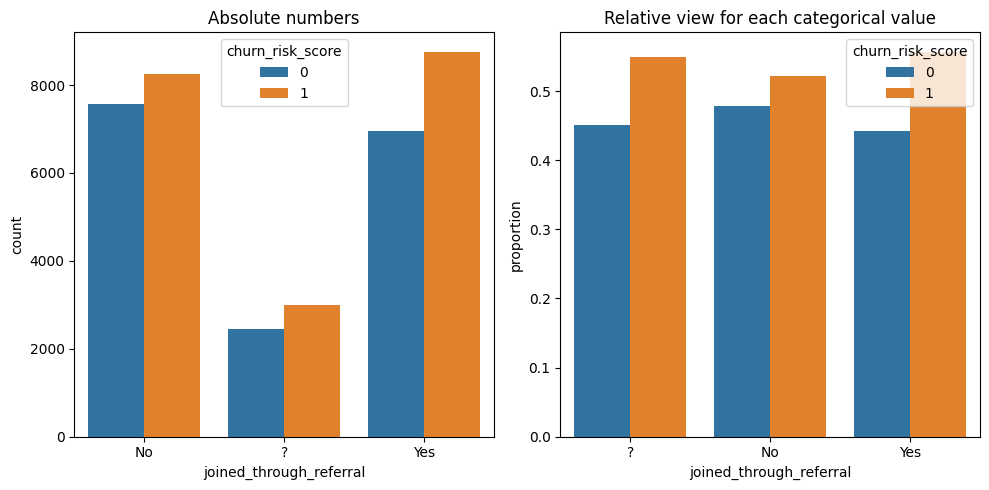

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


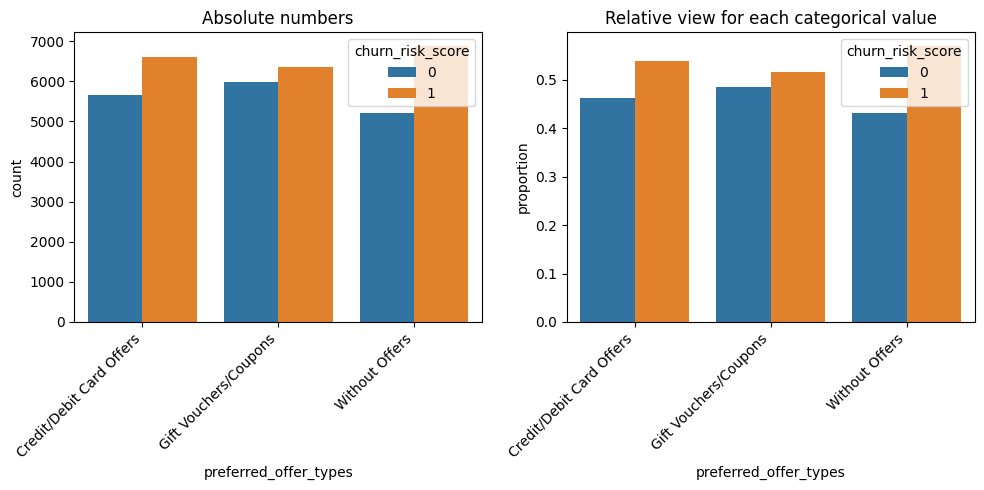

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


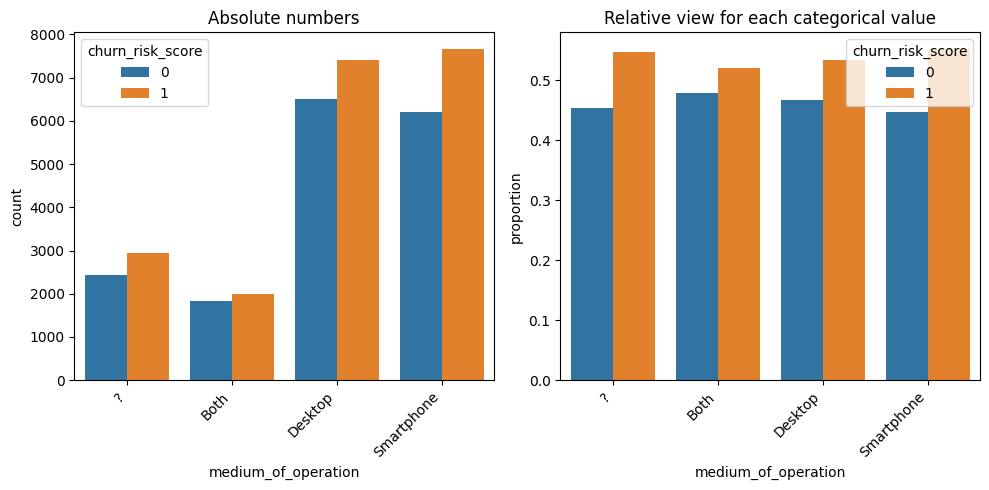

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


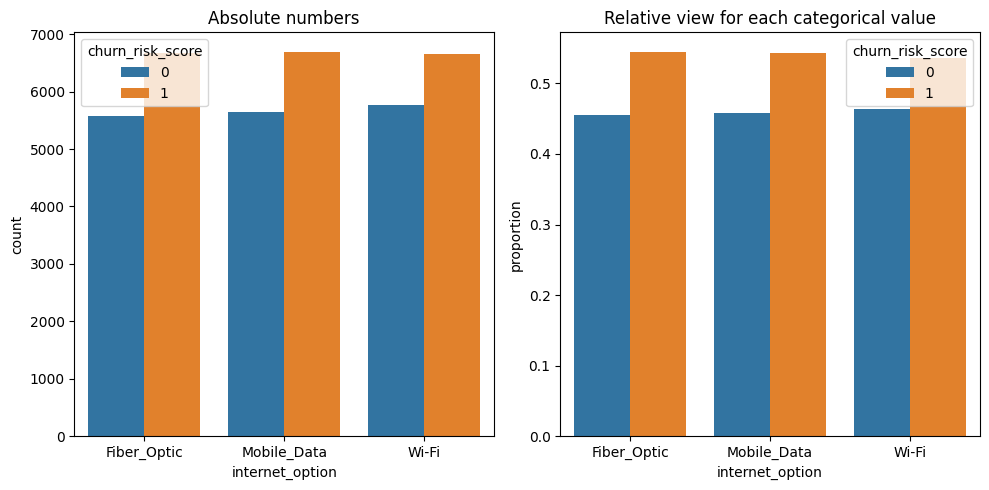

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


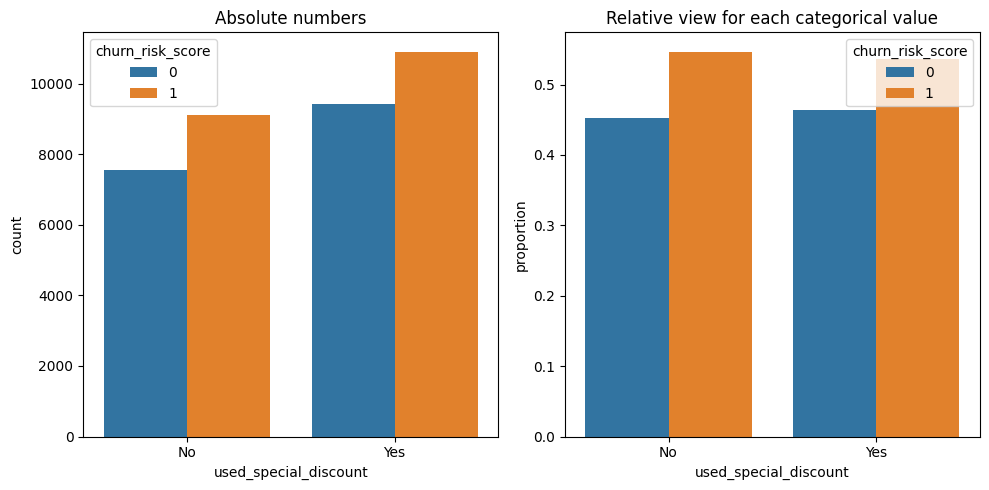

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


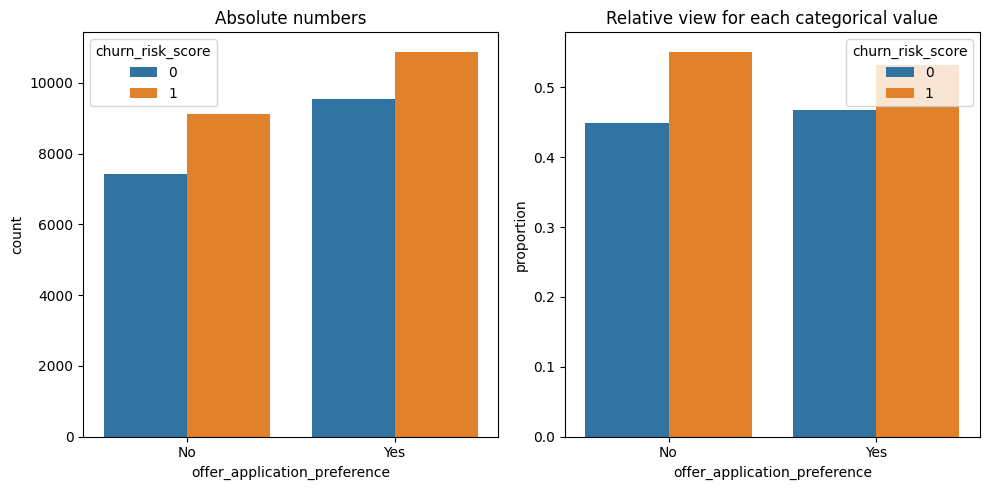

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()


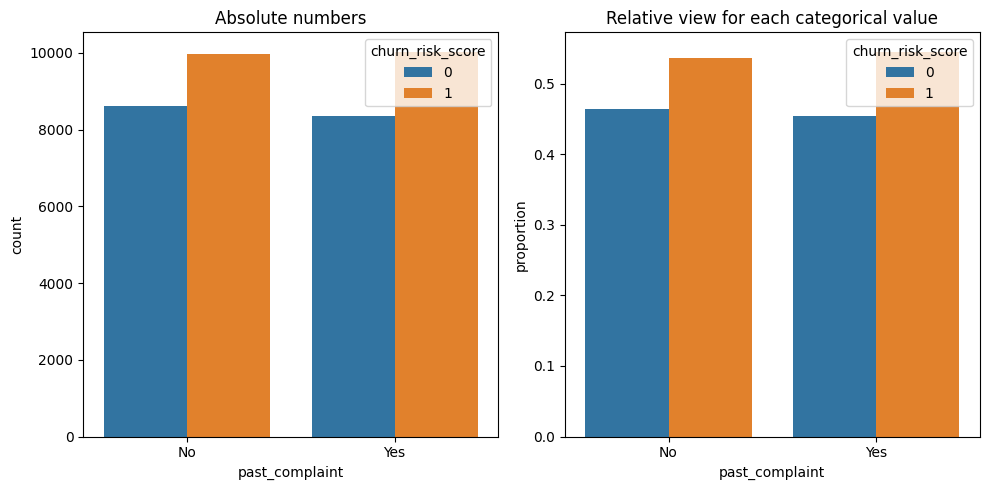

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


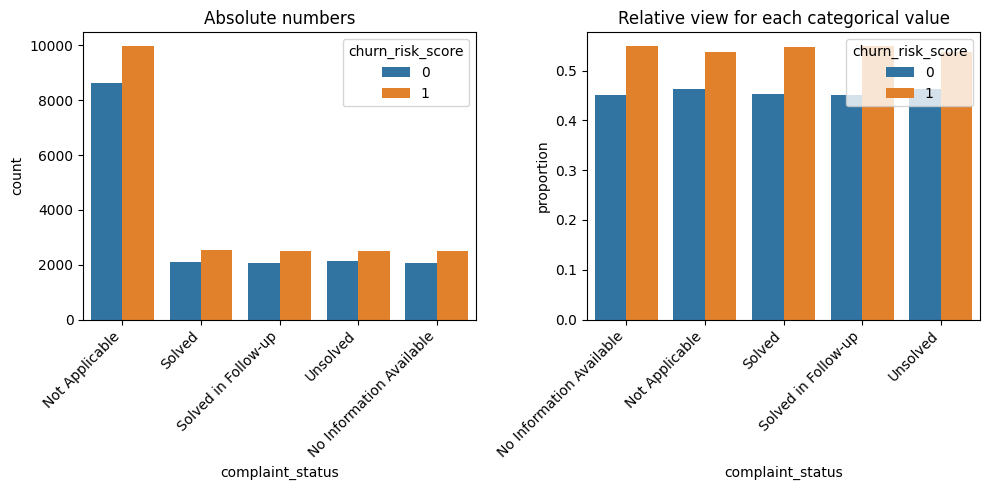

/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')
/var/folders/7x/7jvqdh2175sfpc8m23x4jhkc0000gn/T/ipykernel_49773/2971191338.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


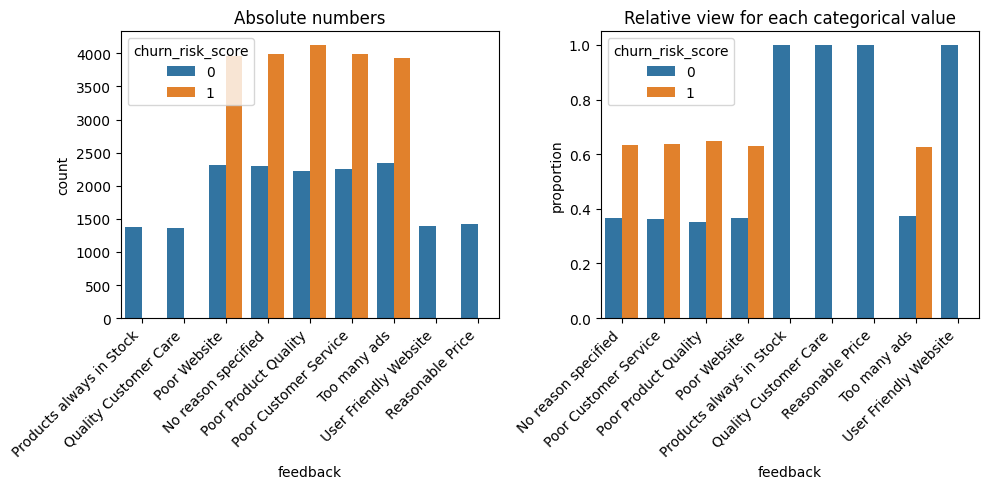

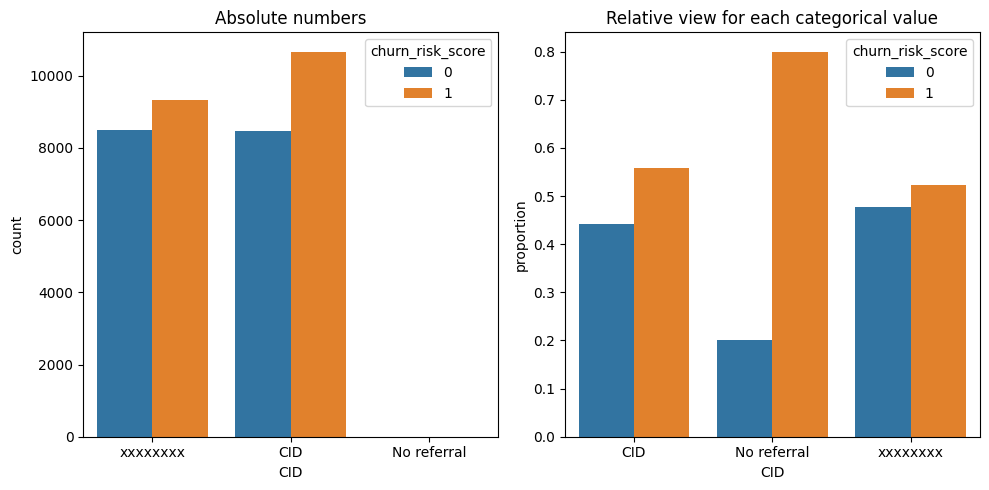

In [56]:
for plot in df_categorical.columns:
    #absolute
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    sns.countplot(df, x = plot, hue = 'churn_risk_score', ax=axes[0])
    axes[0].set_title('Absolute numbers')

    if df[plot].nunique() > 3 or df[plot].nunique() > 2 and len(df[plot].unique()[0]) > 10:
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')

    #relative
    df_prop = df.groupby(plot)['churn_risk_score'].value_counts(normalize=True).rename('proportion').reset_index()
    sns.barplot(data=df_prop, x = plot, y='proportion', hue = 'churn_risk_score', ax = axes[1])
    axes[1].set_title('Relative view for each categorical value')
    if df[plot].nunique() > 3 or df[plot].nunique() > 2 and len(df[plot].unique()[0]) > 10:
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


## First Learning from Categorical values

Major impact
- **Feedback**: Only customers giving negative feedback tend to churn. Customers giving positive feedback always stay.
- **membership_category**: higher levels less likely to churn

Minor impact 
- **region_category**
- preferred_offer_types
- used_special_discount
- offer_application_reference
- **past_complaint**: Interesting considering the importance of **feedback**
- **CID**: Seems to have some minor importance


No impact
- gender
- joined_through_referral
- medium_of_operation
- internet_option
- **complaint_status**: Interesting considering the importance of **feedback**; prevention probably more important than solving a problem

## Correlation

In [61]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Example categorical data (replace this with your actual data)

# Function to calculate Cramer's V

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for all pairs of categorical variables
corr_matrix = pd.DataFrame(index=df_categorical.columns, columns=df_categorical.columns)
for i in range(len(df_categorical.columns)):
    for j in range(len(df_categorical.columns)):
        if i != j:
            corr_matrix.iloc[i, j] = cramers_v(df[df_categorical.columns[i]], df[df_categorical.columns[j]])

# Fill diagonal with 1 (maximum correlation)
np.fill_diagonal(corr_matrix.values, 1)

print("Correlation Matrix:")
print(corr_matrix)

In [ ]:
sns.heatmap

## Todo for cleaning
### features to be ordinal encoded after splitting:
- membership_category 

### features to be further examined:
- 'referral_id', 'joined_through_referral' 
  -> correlation between the features  
  -> how to deal with '?' and no_referrals with a CID-number   
  -> correlation between specific 'referral_id' and target. e.g. CID5xxx has a higher value for customer loyalty as CID1XXXX
- 'feedback' group by positive and negative feedback

### to drop
- preferred_offer_types NaN

### special cases
- days_since_last_login value -999 might be user who never logged into the site
- avg_time_spent examine negative values
- complaint_status -> how to deal with "no information available"
